# Get Fav Character Color Palette

In [1]:
import pandas as pd

df_title = pd.read_csv("filtered_title_2.csv", delimiter=";")
df_title = df_title.loc[df_title.Ending != 'Unknown']

df_char = pd.read_csv("cleaned_char_dataset.csv", delimiter=";")

In [ ]:
df_filtered = df_char.merge(df_title[['jp_title']], on='jp_title', how='inner')
df_filtered = df_filtered.dropna()
df_filtered = df_filtered.drop_duplicates(subset="char_name")
df_filtered.sample(10)

jp_title  \
8186                              Megami no Café Terrace   
1112                                  Shaman King (2021)   
3072                            Puraore! Pride of Orange   
2914                          Taishou Otome Otogibanashi   
542                                   WIXOSS Diva(A)Live   
1914                   Tsuki ga Michibiku Isekai Douchuu   
6587                    Uchi no Shishou wa Shippo ga Nai   
2123                         Mahouka Koukou no Yuutousei   
10012                Kibou no Chikara: Otona Precure '23   
6377   Noumin Kanren no Skill bakka Agetetara Nazeka ...   

                           char_name   fav  \
8186          Akane Hououji (鳳凰寺 紅葉)   392   
1112          Anna Kyouyama (恐山 アンナ)   660   
3072            Eri Yamanaka (山中 依里)     1   
2914             Tamao Shima (志磨 珠央)     1   
542    Mikoto Fujishima (藤嶋美琴（みこみこ）)     0   
1914                       Ema  (エマ)    25   
6587            Tenjin-chan  (天神ちゃん)     0   
2123            Miyuki Shiba (司波 深雪)  2614   
10012             Saki Hyuuga (日向 咲)    31   
6377                   Ilvia  (イルビア)     8   

                                                     img  
8186   https://cdn.myanimelist.net/images/characters/...  
1112   https://cdn.myanimelist.net/images/characters/...  
3072   https://cdn.myanimelist.net/images/characters/...  
2914   https://cdn.myanimelist.net/images/characters/...  
542    https://cdn.myanimelist.net/images/characters/...  
1914   https://cdn.myanimelist.net/images/characters/...  
6587   https://cdn.myanimelist.net/images/characters/...  
2123   https://cdn.myanimelist.net/images/characters/...  
10012  https://cdn.myanimelist.net/images/characters/...  
6377   https://cdn.myanimelist.net/images/characters/...

In [3]:
from colorPallete import ColorPaletteExtractor

def get_color_palette(url, num_clusters=30):
    """Helper function to extract color palette from a URL."""
    extractor = ColorPaletteExtractor()
    try:
        extractor.load_image_from_url(url)
        extractor.extract_palette(num_clusters=num_clusters)
        palette = extractor.get_palette()
        # Convert BGR to RGB and then to hex
        return palette.tolist()
    except Exception as e:
        print(f"Error processing {url}: {e}")
        return []

# n_filter = 10000

# df_choosen = df_filtered.loc[df_filtered.fav > n_filter]
df_choosen = df_filtered
print(df_choosen.shape)
df_choosen

from tqdm.auto import tqdm

tqdm.pandas()

df_choosen['colors'] = df_choosen['img'].progress_apply(get_color_palette)
df_choosen.to_csv("fixed_filtered_char_color.csv")

# import numpy as np
# import concurrent.futures
# from colorPallete import ColorPaletteExtractor
# from tqdm.auto import tqdm

# def get_color_palette(url, num_clusters=30, timeout=60):
#     """Helper function to extract color palette from a URL with timeout."""
#     extractor = ColorPaletteExtractor()
    
#     def process():
#         """Inner function to process image within a thread."""
#         try:
#             extractor.load_image_from_url(url)
#             extractor.extract_palette(num_clusters=num_clusters)
#             palette = extractor.get_palette()
#             return palette.tolist()
#         except Exception as e:
#             print(f"Error processing {url}: {e}")
#             return []
    
#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         future = executor.submit(process)
#         try:
#             return future.result(timeout=timeout)
#         except concurrent.futures.TimeoutError:
#             print(f"Timeout processing {url}")
#             return []

# n_filter = 20000  # Filter threshold

# df_choosen = df_filtered.loc[df_filtered.fav > n_filter]
# print(df_choosen.shape)

# tqdm.pandas()

# df_choosen['colors'] = df_choosen['img'].progress_apply(lambda url: get_color_palette(url, num_clusters=30))
# df_choosen.to_csv("filtered_char_color.csv")


(6244, 4)


  0%|          | 0/6244 [00:00<?, ?it/s]

Error processing https://cdn.myanimelist.net/images/characters/5/390162.jpg: Error loading image from URL: HTTP Error 404: Not Found


In [5]:
# test_read = pd.read_csv("fixed_full_color.csv")
test_read = pd.read_csv("fixed_filtered_char_color.csv")
test_read.head()

Unnamed: 0  jp_title               char_name    fav  \
0           0  Horimiya  Izumi Miyamura (宮村 伊澄)  16137   
1           1  Horimiya      Kyouko Hori (堀 京子)  12528   
2           2  Horimiya  Yuki Yoshikawa (吉川 由紀)   1502   
3           3  Horimiya    Kyousuke Hori (堀 京介)   1061   
4           4  Horimiya  Honoka Sawada (沢田 ほのか)    433   

                                                 img  \
0  https://cdn.myanimelist.net/images/characters/...   
1  https://cdn.myanimelist.net/images/characters/...   
2  https://cdn.myanimelist.net/images/characters/...   
3  https://cdn.myanimelist.net/images/characters/...   
4  https://cdn.myanimelist.net/images/characters/...   

                                              colors  
0  [[194, 222, 249], [185, 220, 250], [177, 200, ...  
1  [[220, 237, 253], [208, 227, 250], [192, 203, ...  
2  [[195, 219, 249], [158, 226, 245], [141, 216, ...  
3  [[221, 236, 245], [202, 232, 253], [192, 219, ...  
4  [[226, 234, 243], [191, 210, 239], [174, 201, ...

# Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from ast import literal_eval
import matplotlib.pyplot as plt

In [2]:
# read selected character
df = pd.read_csv("fixed_filtered_char_color.csv")
df = df.drop(columns="Unnamed: 0")

# make sure
df = df.dropna()
df = df.drop_duplicates()

# checking dataset
print(df.shape)
df.head()

(75, 5)


jp_title                      char_name  \
0                                   Horimiya         Izumi Miyamura (宮村 伊澄)   
1                                   Horimiya             Kyouko Hori (堀 京子)   
2   Mushoku Tensei: Isekai Ittara Honki Dasu  Rudeus Greyrat (ルーデウス・グレイラット)   
3                      Dr. Stone: Stone Wars        Senkuu Ishigami (石神 千空)   
4  Tensei shitara Slime Datta Ken 2nd Season     Rimuru Tempest (リムル＝テンペスト)   

     fav                                                img  \
0  16137  https://cdn.myanimelist.net/images/characters/...   
1  12528  https://cdn.myanimelist.net/images/characters/...   
2  10221  https://cdn.myanimelist.net/images/characters/...   
3  22824  https://cdn.myanimelist.net/images/characters/...   
4  23554  https://cdn.myanimelist.net/images/characters/...   

                                              colors  
0  [[194, 222, 249], [185, 220, 250], [177, 200, ...  
1  [[220, 237, 253], [208, 227, 250], [192, 203, ...  
2  [[221, 234, 246], [179, 215, 251], [140, 207, ...  
3  [[213, 231, 245], [203, 219, 236], [188, 205, ...  
4  [[219, 232, 248], [178, 209, 229], [145, 164, ...

In [3]:
# # change str -> np.array
# df['colors'] = df['colors'].apply(lambda x: np.array(literal_eval(x)))

# # Flatten the color arrays into a single feature vector per row (mean of RGB values)
# df['color_features'] = df['colors'].apply(lambda x: x.mean(axis=0) if x.size > 0 else np.zeros(3))

# # Convert to NumPy array for clustering
# X = np.vstack(df['color_features'].values)

# # Perform K-Means clustering (choose 2 clusters for example)
# kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
# df['cluster'] = kmeans.fit_predict(X)

# df.sample(5)

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Convert string representation to numpy arrays
df['colors'] = df['colors'].apply(lambda x: np.array(literal_eval(x)))

# 1. Create better color features
def create_color_features(palette):
    """Create comprehensive color features for clustering"""
    if len(palette) == 0:
        return np.zeros(15)  # Handle empty palettes
    
    # Normalize color values to [0, 1]
    normalized = palette / 255.0
    
    # Basic statistics
    mean = normalized.mean(axis=0)
    std = normalized.std(axis=0)
    
    # Color diversity features
    unique_colors = np.unique(normalized, axis=0)
    unique_ratio = len(unique_colors) / len(palette)
    
    # Dominant color (using simple histogram)
    hist, bins = np.histogramdd(normalized, bins=(3,3,3), range=[(0,1),(0,1),(0,1)])
    dominant = hist.flatten() / hist.sum()
    
    # Combine all features
    return np.concatenate([
        mean,            # 3 features
        std,             # 3 features
        [unique_ratio],  # 1 feature
        dominant         # 27 features (3x3x3)
    ])                   # Total: 34 features

# 2. Create feature vectors
df['color_features'] = df['colors'].apply(create_color_features)

# 3. Standardize features
X = np.vstack(df['color_features'].values)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Perform clustering with better initialization
kmeans = KMeans(
    n_clusters=4,
    random_state=42,
    n_init=10,
    init='k-means++',  # Better initialization than random
    max_iter=1000
)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Show sample results
df.sample(5)

jp_title                   char_name  \
4   Tensei shitara Slime Datta Ken 2nd Season  Rimuru Tempest (リムル＝テンペスト)   
74                  Natsume Yuujinchou Shichi      Takashi Natsume (夏目貴志)   
12                             Jujutsu Kaisen         Satoru Gojou (五条 悟)   
24                   Fruits Basket: The Final          Tooru Honda (本田 透)   
9                      5-toubun no Hanayome ∬         Nino Nakano (中野 二乃)   

      fav                                                img  \
4   23554  https://cdn.myanimelist.net/images/characters/...   
74  10197  https://cdn.myanimelist.net/images/characters/...   
12  61958  https://cdn.myanimelist.net/images/characters/...   
24  11412  https://cdn.myanimelist.net/images/characters/...   
9   14892  https://cdn.myanimelist.net/images/characters/...   

                                               colors  \
4   [[219, 232, 248], [178, 209, 229], [145, 164, ...   
74  [[194, 242, 254], [187, 221, 247], [153, 189, ...   
12  [[198, 211, 244], [178, 196, 233], [130, 141, ...   
24  [[228, 241, 253], [209, 220, 245], [175, 185, ...   
9   [[212, 231, 253], [204, 224, 253], [188, 196, ...   

                                       color_features  cluster  
4   [0.5866666666666667, 0.5352941176470588, 0.482...        0  
74  [0.4683660130718954, 0.5798692810457517, 0.638...        3  
12  [0.46156862745098043, 0.41045751633986927, 0.3...        1  
24  [0.5481045751633987, 0.4559477124183007, 0.550...        0  
9   [0.6159477124183007, 0.5526797385620914, 0.684...        0

In [4]:
df.to_csv("4_cluster_character.csv")
# df.to_csv("8_cluster_character.csv")
# df.to_csv("6_cluster_character.csv")
# df.to_csv("7_cluster_character.csv")
# df.to_csv("3_cluster_character.csv")
# df.to_csv("5_cluster_character.csv")

Best 4, 5 , 6, 7

########## 0 ##########


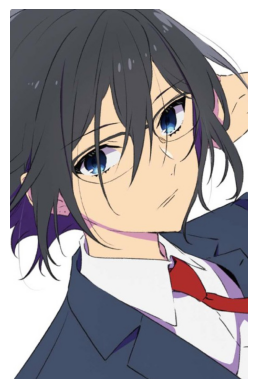

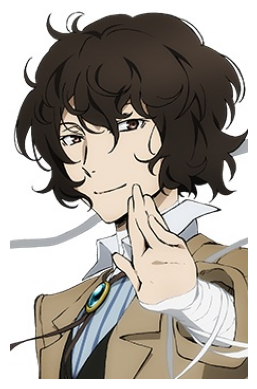

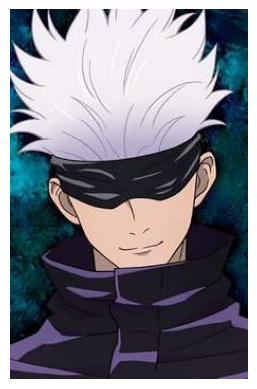

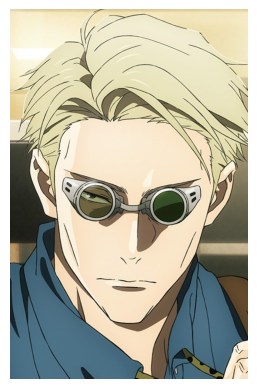

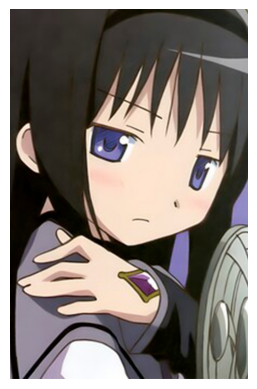

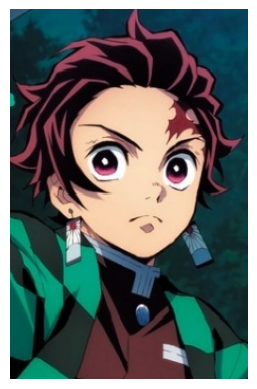

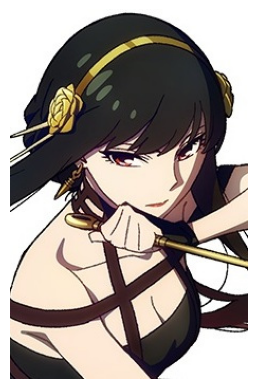

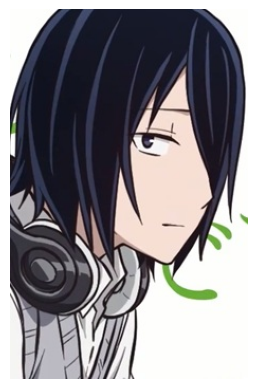

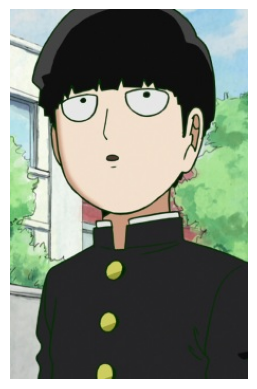

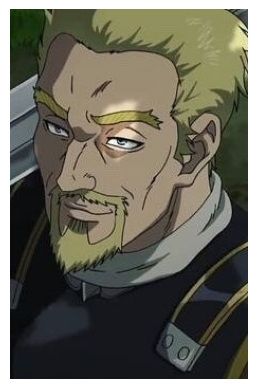

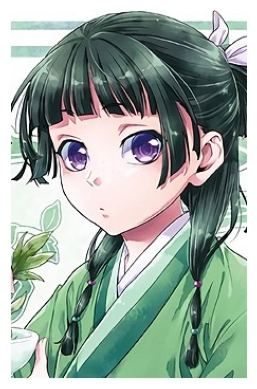

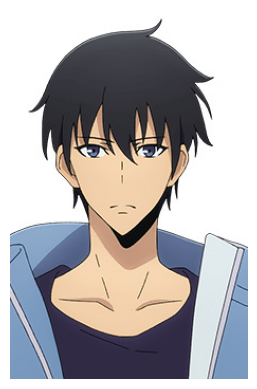

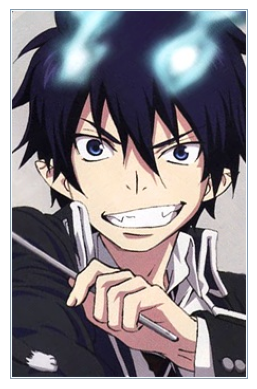

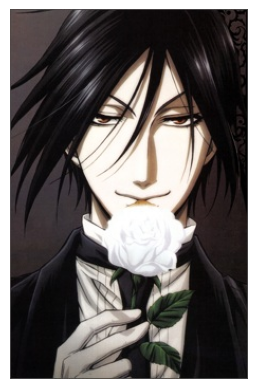

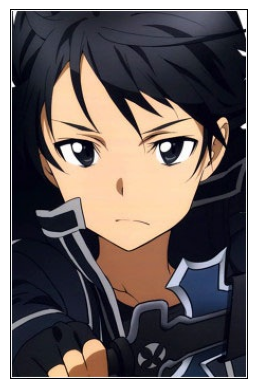

########## 1 ##########


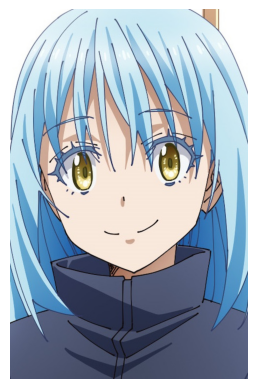

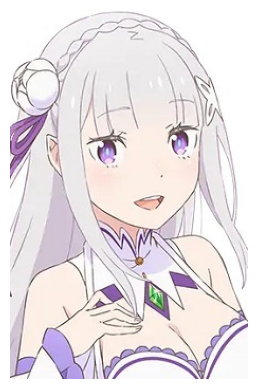

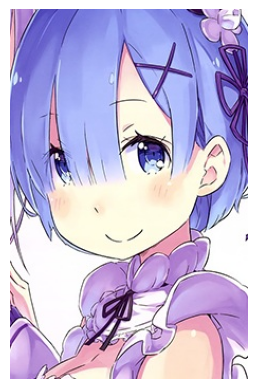

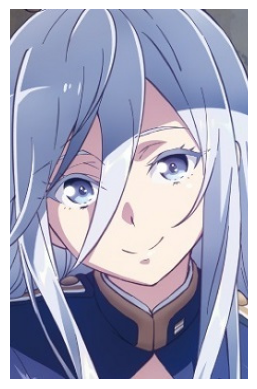

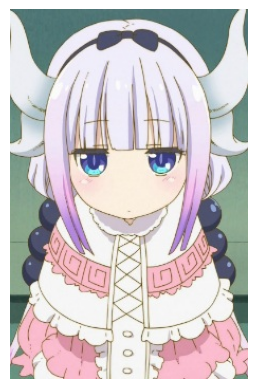

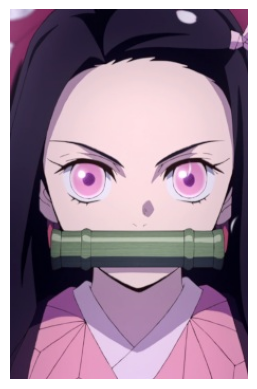

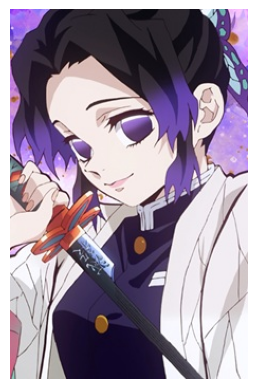

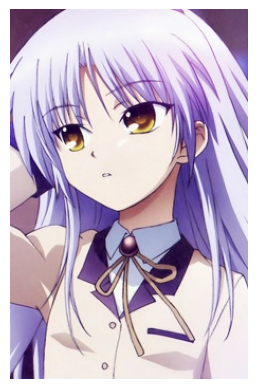

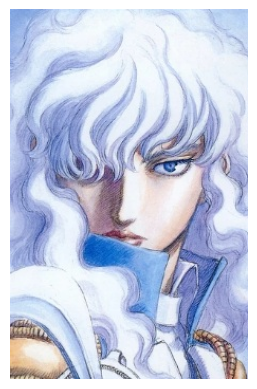

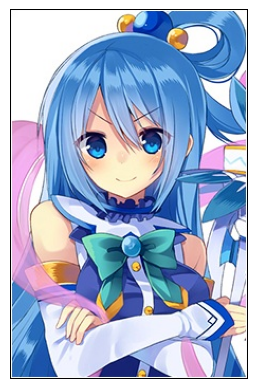

########## 2 ##########


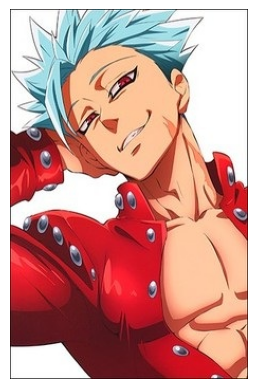

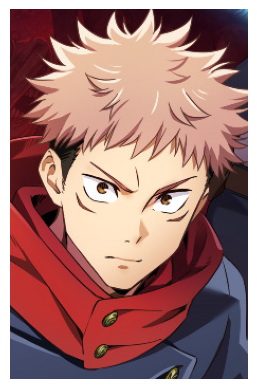

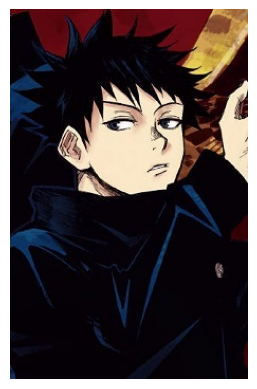

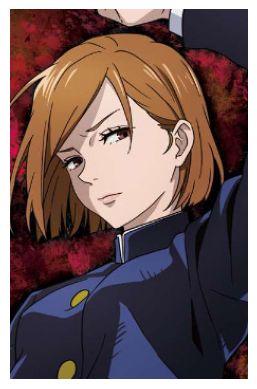

In [ ]:
import pandas as pd
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

df = pd.read_csv("5_cluster_character.csv")

# URL of the image
for cluster in sorted(df.cluster.unique()):
    print("#"*10, cluster, "#"*10)
    vis_df = df.loc[df.cluster == cluster]    
    for url in vis_df.img:
        # Fetch the image from the URL
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))

        # Display the image using matplotlib
        plt.imshow(img)
        plt.axis("off")  # Hide axes
        plt.show()




In [ ]:
df.loc[df.cluster == 4]

jp_title  \
37      Nanatsu no Taizai: Funnu no Shinpan   
41               Log Horizon: Entaku Houkai   
52                           Jujutsu Kaisen   
53                           Jujutsu Kaisen   
54                           Jujutsu Kaisen   
57                           Jujutsu Kaisen   
60                           Jujutsu Kaisen   
77         Boku no Hero Academia 5th Season   
79         Boku no Hero Academia 5th Season   
80         Boku no Hero Academia 5th Season   
81         Boku no Hero Academia 5th Season   
84         Boku no Hero Academia 5th Season   
85         Boku no Hero Academia 5th Season   
86         Boku no Hero Academia 5th Season   
90                                       86   
102                      Shaman King (2021)   
106                     Nomad: Megalo Box 2   
126            Komi-san wa, Comyushou desu.   
129      Kimetsu no Yaiba: Mugen Ressha-hen   
183                             Overlord IV   
185                             Overlord IV   
187                          Lycoris Recoil   
202                            Chainsaw Man   
210                               Blue Lock   
211                               Blue Lock   
222                        Bocchi the Rock!   
225                 Golden Kamuy 4th Season   
226                 Golden Kamuy 4th Season   
233  Meitantei Conan: Hannin no Hanzawa-san   
235  Meitantei Conan: Hannin no Hanzawa-san   
237                   Vinland Saga Season 2   
263               Jujutsu Kaisen 2nd Season   
272                       Sousou no Frieren   
276                                MF Ghost   
290        Kuroshitsuji: Kishuku Gakkou-hen   
291        Kuroshitsuji: Kishuku Gakkou-hen   

                                    char_name    fav  \
37                          Escanor  (エスカノール)   7782   
41                           Akatsuki  (アカツキ)   2792   
52                      Yuuji Itadori (虎杖 悠仁)  16760   
53                    Megumi Fushiguro (伏黒 恵)  12728   
54                   Nobara Kugisaki (釘崎 野薔薇)  10617   
57                         Maki Zenin (禪院 真希)   8828   
60                        Suguru Getou (夏油 傑)   5595   
77                     Izuku Midoriya (緑谷 出久)  25537   
79                    Katsuki Bakugou (爆豪 勝己)  23065   
80                       All Might  (オール・マイト)   9777   
81                      Shouta Aizawa (相澤 消太)   7842   
84                    Ochako Uraraka (麗日 お茶子)   5605   
85                                 Dabi  (荼毘)   5001   
86                         Tsuyu Asui (蛙吹 梅雨)   4673   
90                  Shinei Nouzen (シンエイ・ノウゼン)   8637   
102                        You Asakura (麻倉 葉)   2746   
106                Joe  (ジョー / ジャンクドッグ / ノマド)   1662   
126                       Shouko Komi (古見 硝子)   9639   
129                  Tanjirou Kamado (竈門 炭治郎)  24662   
183                           Momonga  (モモンガ)  13722   
185  Shalltear Bloodfallen (シャルティア・ブラッドフォールン)   2451   
187                    Takina Inoue (井ノ上 たきな)   2809   
202                              Denji  (デンジ)  19479   
210                     Meguru Bachira (蜂楽 廻)   4034   
211                       Yoichi Isagi (潔 世一)   3684   
222                     Kikuri Hiroi (廣井 きくり)   2098   
225                   Saichi Sugimoto (杉元 佐一)   2836   
226                Hyakunosuke Ogata (尾形 百之助)   1598   
233                   Conan Edogawa (江戸川 コナン)   7468   
235                         Ai Haibara (灰原 哀)   2544   
237                        Askeladd  (アシェラッド)  28184   
263                   Touji Fushiguro (伏黒 甚爾)   7117   
272                            Stark  (シュタルク)   2120   
276                Ryousuke Takahashi (高橋 涼介)   1803   
290        Sebastian Michaelis (セバスチャン・ミカエリス)  22327   
291           Ciel Phantomhive (シエル・ファントムハイヴ)  11850   

                                                   img  \
37   https://cdn.myanimelist.net/images/characters/...   
41   https://cdn.myanimelist.net/images/characters/...   
52   https://cdn.myanimelist.net/images/characte

In [ ]:

# df['colors'] = df['colors'].apply(lambda x: np.array(literal_eval(x)))
# df.head()

jp_title  \
0                              Dr. Stone: Stone Wars   
1          Tensei shitara Slime Datta Ken 2nd Season   
2  Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...   
3  Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...   
4  Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...   

                    char_name    fav  \
0     Senkuu Ishigami (石神 千空)  22824   
1  Rimuru Tempest (リムル＝テンペスト)  23554   
2              Emilia  (エミリア)  23267   
3    Subaru Natsuki (ナツキ・スバル)  21895   
4                   Rem  (レム)  45866   

                                                 img  \
0  https://cdn.myanimelist.net/images/characters/...   
1  https://cdn.myanimelist.net/images/characters/...   
2  https://cdn.myanimelist.net/images/characters/...   
3  https://cdn.myanimelist.net/images/characters/...   
4  https://cdn.myanimelist.net/images/characters/...   

                                              colors  
0  [[206, 222, 238], [185, 202, 218], [172, 193, ...  
1  [[218, 231, 247], [144, 164, 199], [122, 128, ...  
2  [[229, 238, 252], [186, 193, 238], [67, 58, 73...  
3  [[197, 222, 253], [177, 189, 208], [127, 156, ...  
4  [[207, 221, 250], [187, 168, 234], [52, 12, 33...

In [32]:
# Flatten the color arrays into a single feature vector per row (mean of RGB values)
df['color_features'] = df['colors'].apply(lambda x: x.mean(axis=0) if x.size > 0 else np.zeros(3))

# Convert to NumPy array for clustering
X = np.vstack(df['color_features'].values)

# Perform K-Means clustering (choose 2 clusters for example)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

print(df[['color_features', 'cluster']])

                                       color_features  cluster
0     [123.6, 143.46666666666667, 173.33333333333334]        3
1     [158.73333333333332, 145.4, 131.46666666666667]        1
2                  [183.6, 171.2, 186.46666666666667]        1
3                  [108.0, 123.53333333333333, 150.4]        2
4   [189.66666666666666, 147.73333333333332, 165.8...        1
5   [147.46666666666667, 141.53333333333333, 160.2...        3
6     [126.86666666666666, 135.53333333333333, 142.0]        3
7     [125.26666666666667, 112.53333333333333, 102.6]        4
8                    [81.6, 91.13333333333334, 102.2]        0
9     [102.06666666666666, 105.73333333333333, 134.6]        2
10      [81.2, 92.46666666666667, 129.66666666666666]        0
11    [158.73333333333332, 145.4, 131.46666666666667]        1
12    [158.73333333333332, 145.4, 131.46666666666667]        1
13                 [107.33333333333333, 109.0, 117.2]        4
14                   [81.6, 91.13333333333334, 102.2]  

In [37]:
df.loc[df.cluster == 0].sample(5)

Unnamed: 0.1  test  Unnamed: 0  \
1387          8705  8705           7   
87             197   197         197   
1283          8007  8007           3   
599           3382  3382         189   
1280          8004  8004           0   

                                               jp_title  \
1387                Kimetsu no Yaiba: Hashira Geiko-hen   
87                                  Yuru Camp△ Season 2   
1283                           Ore dake Level Up na Ken   
599   Honzuki no Gekokujou: Shisho ni Naru Tame ni w...   
1280                           Ore dake Level Up na Ken   

                                               en_title            char_name  \
1387  Demon Slayer: Kimetsu no Yaiba Hashira Trainin...  Tengen Uzui (宇髄 天元)   
87                              Laid-Back Camp Season 2   Ayano Toki (土岐 綾乃)   
1283                                      Solo Leveling    Jin-Ah Sung (성진아)   
599                   Ascendance of a Bookworm Season 3          Fran  (フラン)   
1280                                      Solo Leveling  Jin-Woo Sung (성 진우)   

                           fav  \
1387   Member Favorites: 5,664   
87        Member Favorites: 49   
1283     Member Favorites: 318   
599        Member Favorites: 6   
1280  Member Favorites: 17,628   

                                                    img  \
1387  https://cdn.myanimelist.net/images/characters/...   
87    https://cdn.myanimelist.net/images/characters/...   
1283  https://cdn.myanimelist.net/images/characters/...   
599   https://cdn.myanimelist.net/images/characters/...   
1280  https://cdn.myanimelist.net/images/characters/...   

                                                 colors  \
1387  [[20, 17, 18], [196, 218, 244], [87, 78, 55], ...   
87    [[254, 254, 254], [110, 149, 139], [68, 64, 79...   
1283  [[253, 253, 252], [106, 83, 100], [193, 152, 9...   
599   [[254, 254, 254], [175, 168, 169], [70, 61, 50...   
1280  [[254, 254, 254], [76, 67, 67], [193, 159, 129...   

             color_features  cluster  
1387  [123.3, 124.7, 133.5]        0  
87    [121.1, 132.0, 140.9]        0  
1283  [139.5, 133.5, 147.0]        0  
599   [145.6, 137.5, 136.7]        0  
1280  [138.8, 135.9, 139.5]        0

In [38]:
df.loc[df.cluster == 1].sample(5)

Unnamed: 0.1  test  Unnamed: 0  \
1091          6454  6454         534   
1570          9959  9959         551   
1100          6483  6483         563   
440           2637  2637          10   
943           5685  5685         570   

                                         jp_title  \
1091                              Meitantei Conan   
1570             Boku no Hero Academia 7th Season   
1100                      Golden Kamuy 4th Season   
440   Shingeki no Kyojin: The Final Season Part 2   
943              Boku no Hero Academia 6th Season   

                                  en_title                char_name  \
1091                           Case Closed        Ai Haibara (灰原 哀)   
1570             My Hero Academia Season 7   Izuku Midoriya (緑谷 出久)   
1100                 Golden Kamuy Season 4  Saichi Sugimoto (杉元 佐一)   
440   Attack on Titan: Final Season Part 2  Eren Yeager (エレン・イェーガー)   
943              My Hero Academia Season 6     All Might  (オール・マイト)   

                           fav  \
1091   Member Favorites: 2,544   
1570  Member Favorites: 25,534   
1100   Member Favorites: 2,836   
440   Member Favorites: 71,892   
943    Member Favorites: 9,777   

                                                    img  \
1091  https://cdn.myanimelist.net/images/characters/...   
1570  https://cdn.myanimelist.net/images/characters/...   
1100  https://cdn.myanimelist.net/images/characters/...   
440   https://cdn.myanimelist.net/images/characters/...   
943   https://cdn.myanimelist.net/images/characters/...   

                                                 colors  \
1091  [[183, 209, 250], [65, 111, 153], [37, 53, 58]...   
1570  [[76, 97, 7], [184, 217, 252], [2, 2, 118], [1...   
1100  [[5, 5, 11], [156, 197, 233], [55, 99, 124], [...   
440   [[8, 16, 10], [176, 193, 199], [48, 72, 60], [...   
943   [[2, 240, 254], [10, 6, 11], [80, 118, 163], [...   

             color_features  cluster  
1091    [82.4, 98.6, 144.3]        1  
1570    [88.1, 97.8, 129.3]        1  
1100   [83.9, 101.0, 128.7]        1  
440   [104.7, 130.7, 140.2]        1  
943    [89.6, 124.8, 160.4]        1

In [ ]:
df.loc[df.cluster == 2].sample(5)

Unnamed: 0.1  test  Unnamed: 0  \
452           2649  2649          22   
336           1820  1820         396   
448           2645  2645          18   
577           3310  3310         117   
1426          8754  8754          56   

                                         jp_title  \
452               Sono Bisque Doll wa Koi wo Suru   
336                               Meitantei Conan   
448   Shingeki no Kyojin: The Final Season Part 2   
577                                 Paripi Koumei   
1426             Boku no Hero Academia 7th Season   

                                  en_title                    char_name  \
452                    My Dress-Up Darling          Sajuna Inui (乾 紗寿叶)   
336                            Case Closed  Mitsuhiko Tsuburaya (円谷 光彦)   
448   Attack on Titan: Final Season Part 2   Annie Leonhart (アニ・レオンハート)   
577                       Ya Boy Kongming!       Steve Kido (スティーブ・キド　)   
1426             My Hero Academia Season 7         Himiko Toga (渡我 被身子)   

                          fav  \
452     Member Favorites: 501   
336      Member Favorites: 41   
448   Member Favorites: 6,027   
577       Member Favorites: 3   
1426  Member Favorites: 5,626   

                                                    img  \
452   https://cdn.myanimelist.net/images/characters/...   
336   https://cdn.myanimelist.net/images/characters/...   
448   https://cdn.myanimelist.net/images/characters/...   
577   https://cdn.myanimelist.net/images/characters/...   
1426  https://cdn.myanimelist.net/images/characters/...   

                                                 colors  \
452   [[187, 193, 233], [100, 105, 132], [253, 253, ...   
336   [[39, 47, 59], [157, 200, 246], [113, 128, 140...   
448   [[167, 187, 198], [49, 86, 135], [206, 233, 25...   
577   [[168, 186, 195], [25, 33, 49], [83, 122, 177]...   
1426  [[108, 139, 155], [206, 223, 240], [38, 49, 86...   

             color_features  cluster  
452   [125.2, 128.9, 158.9]        2  
336   [118.4, 136.2, 149.7]        2  
448   [115.8, 142.8, 158.8]        2  
577   [104.2, 128.4, 155.6]        2  
1426  [112.9, 126.9, 171.5]        2

In [54]:
df.loc[df.cluster == 3].sample(5)

Unnamed: 0.1  test  Unnamed: 0  \
248            993   993         236   
823           4714  4714         243   
1574          9963  9963         555   
1594          9983  9983         575   
850           4975  4975         504   

                                               jp_title  \
248                                 Nomad: Megalo Box 2   
823                             Golden Kamuy 4th Season   
1574                   Boku no Hero Academia 7th Season   
1594  Ookami to Koushinryou: Merchant Meets the Wise...   
850                                     Meitantei Conan   

                                          en_title  \
248                             Megalobox 2: Nomad   
823                          Golden Kamuy Season 4   
1574                     My Hero Academia Season 7   
1594  Spice and Wolf: Merchant Meets the Wise Wolf   
850                                    Case Closed   

                       char_name                      fav  \
248                 Marla  (マーラ)     Member Favorites: 10   
823   Hyakunosuke Ogata (尾形 百之助)  Member Favorites: 1,598   
1574       Shouta Aizawa (相澤 消太)  Member Favorites: 7,841   
1594    Dian Rubens (ディアン・ルーベンス)     Member Favorites: 27   
850      Conan Edogawa (江戸川 コナン)  Member Favorites: 7,468   

                                                    img  \
248   https://cdn.myanimelist.net/images/characters/...   
823   https://cdn.myanimelist.net/images/characters/...   
1574  https://cdn.myanimelist.net/images/characters/...   
1594  https://cdn.myanimelist.net/images/characters/...   
850   https://cdn.myanimelist.net/images/characters/...   

                                                 colors        color_features  \
248   [[108, 137, 162], [50, 63, 65], [77, 104, 118]...  [93.8, 110.5, 110.0]   
823   [[253, 254, 254], [40, 48, 47], [99, 131, 145]...   [95.9, 99.8, 100.7]   
1574  [[12, 1, 119], [167, 171, 176], [17, 17, 16], ...   [71.6, 72.9, 110.0]   
1594  [[37, 39, 42], [125, 143, 159], [20, 19, 19], ...    [54.0, 61.0, 68.0]   
850   [[97, 131, 180], [58, 32, 12], [164, 156, 140]...   [81.5, 88.4, 107.0]   

      cluster  
248         3  
823         3  
1574        3  
1594        3  
850         3